Accuracy check
=======

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## generate data for accuracy test

In [3]:
! cargo run --release --example l63_accuracy

   Compiling eom v0.9.0 (file:///home/teramura/rhq/github.com/termoshtt/eom)
    Finished release [optimized] target(s) in 4.8 secs
     Running `/home/teramura/rhq/github.com/termoshtt/eom/target/release/examples/l63_accuracy`


## analysis

In [4]:
euler = pd.read_csv("euler.csv").dropna().set_index("dt")
heun = pd.read_csv("heun.csv").dropna().set_index("dt")
rk4 = pd.read_csv("rk4.csv").dropna().set_index("dt")
diag_rk4 = pd.read_csv("diag_rk4.csv").dropna().set_index("dt")

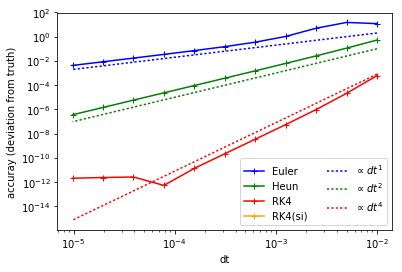

In [5]:
plt.plot(euler, "b+-", label="Euler")
plt.plot(heun, "g+-", label="Heun")
plt.plot(rk4, "r+-", label="RK4")
plt.plot(diag_rk4, "+-", label="RK4(si)", color="orange")
plt.plot(euler.index, 200*euler.index, "b:", label=r"$\propto dt^1$")
plt.plot(heun.index, 1000*heun.index**2, "g:", label=r"$\propto dt^2$")
plt.plot(rk4.index, 80000*rk4.index**4, "r:", label=r"$\propto dt^4$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("dt")
plt.ylabel("accuray (deviation from truth)")
plt.axis("tight")
plt.legend(loc=4, ncol=2)

(si) means semi-implicit scheme